In [1]:
import numpy as np
import juliacall
jl_main = juliacall.Main

In [2]:
glpde = jl_main.include("../src/GradientLimitPDE.jl")

In [3]:
nodal_source_inner = 0.01;
nodal_source_outer = 0.2;
nodal_psi = 1.;
linear_psi = 1.;

In [4]:
inner_boundary = glpde.createCircleBoundary(20, 0.05, [0.5, 0.5], nodal_source_inner, nodal_psi, linear_psi)
outer_boundary = glpde.createSquareBoundary(5, 1.0, [0., 0.], nodal_source_outer, nodal_psi, linear_psi)

In [5]:
background_grid = glpde.UniformSquareGrid([0., 0.], 1., 512, 0.2)

In [6]:
gradient_limit_pde = glpde.GradientLimitPDE(background_grid, jl_main.Vector([inner_boundary, outer_boundary]))

In [7]:
result = glpde.solve(gradient_limit_pde)

In [8]:
result = np.array(result)
result

array([[0.2       , 0.2       , 0.2       , ..., 0.2       , 0.2       ,
        0.2       ],
       [0.2       , 0.1898306 , 0.18291057, ..., 0.1845447 , 0.19067307,
        0.2       ],
       [0.2       , 0.18291057, 0.17043478, ..., 0.17368889, 0.18459121,
        0.2       ],
       ...,
       [0.2       , 0.18994568, 0.18401877, ..., 0.17033887, 0.18285774,
        0.2       ],
       [0.2       , 0.19420242, 0.190451  , ..., 0.18285546, 0.18980021,
        0.2       ],
       [0.2       , 0.2       , 0.2       , ..., 0.2       , 0.2       ,
        0.2       ]])

In [9]:
np.min(result)

0.010047265130599753

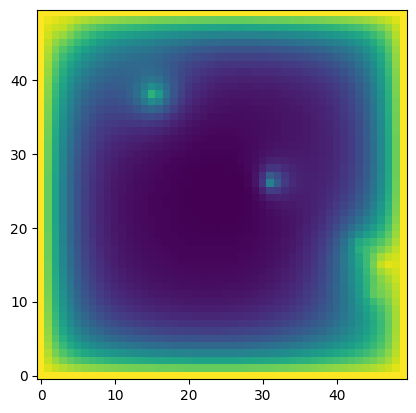

In [10]:
from matplotlib import pyplot as plt
plt.imshow(result, origin="lower")